In [2]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [3]:
connect = sqlite3.connect('../../datasets/checking-logs.sqlite')

In [4]:
query = """ 
SELECT uid,timestamp FROM checker WHERE uid LIKE 'user_%'
"""

In [5]:
commits=pd.read_sql(query,connect,parse_dates=['timestamp'])
commits

,uid,timestamp
0,user_4,2020-04-17 05:19:02.744528
1,user_4,2020-04-17 05:22:35.249331
2,user_4,2020-04-17 05:22:45.549397
3,user_4,2020-04-17 05:34:14.691200
4,user_4,2020-04-17 05:34:24.422370
...,...,...
3202,user_1,2020-05-21 20:19:06.872761
3203,user_1,2020-05-21 20:22:41.785725
3204,user_1,2020-05-21 20:22:41.877806
3205,user_1,2020-05-21 20:37:00.129678


In [6]:
commits['weekday'] = commits['timestamp'].dt.dayofweek
commits['day'] = commits.timestamp.dt.day
commits['hour'] = commits.timestamp.dt.hour
commits['type'] = commits['weekday'].apply(
    lambda x: 'working_day' if x < 5 else 'weekend')
commits = commits.drop(columns=['weekday'])
commits

,uid,timestamp,day,hour,type
0,user_4,2020-04-17 05:19:02.744528,17,5,working_day
1,user_4,2020-04-17 05:22:35.249331,17,5,working_day
2,user_4,2020-04-17 05:22:45.549397,17,5,working_day
3,user_4,2020-04-17 05:34:14.691200,17,5,working_day
4,user_4,2020-04-17 05:34:24.422370,17,5,working_day
...,...,...,...,...,...
3202,user_1,2020-05-21 20:19:06.872761,21,20,working_day
3203,user_1,2020-05-21 20:22:41.785725,21,20,working_day
3204,user_1,2020-05-21 20:22:41.877806,21,20,working_day
3205,user_1,2020-05-21 20:37:00.129678,21,20,working_day


In [7]:
working_day = commits[commits['type'] == 'working_day'][['hour']].reset_index(drop=True)
working_day

,hour
0,5
1,5
2,5
3,5
4,5
...,...
2032,20
2033,20
2034,20
2035,20


In [8]:
weekend = commits[commits['type'] == 'weekend'][['hour']].reset_index(drop=True)
weekend

,hour
0,7
1,13
2,13
3,13
4,13
...,...
1165,22
1166,22
1167,22
1168,22


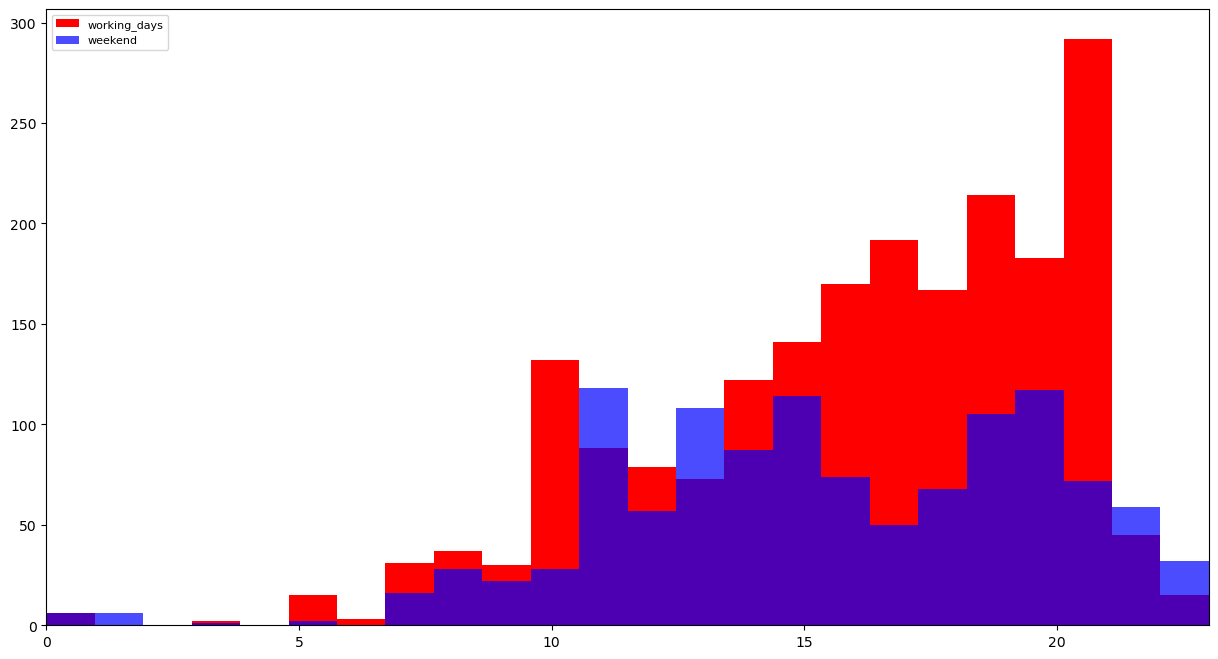

In [9]:
fig,ax = plt.subplots(figsize=(15,8))
ax.hist(working_day['hour'],
        bins=24,
        label='working_days',
        color='red')
ax.hist(weekend['hour'],
        bins=24,
        label='weekend',
        color='blue',
        alpha=0.7)
ax.set_xlim(0,23)
ax.legend(loc='upper left',fontsize='8')
plt.show()

In [10]:
connect.close()

In [11]:
commits_group = commits.groupby(['type', 'hour']).count()['uid'].reset_index()
pivot_table = pd.pivot_table(commits_group,
                             values='uid',
                             index='hour',
                             columns='type')
table_quest = pivot_table[pivot_table['weekend'] > pivot_table['working_day']]
table_quest

type,weekend,working_day
hour,,
11,118.0,88.0
13,108.0,73.0
22,59.0,45.0
23,32.0,15.0
